In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Function to define Inception module
def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 convolution
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # Max pooling
    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_conv = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)

    # Concatenate the outputs
    return layers.concatenate([conv1x1, conv3x3, conv5x5, pool_conv])

# Function to define GoogLeNet architecture
def googlenet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # First Convolutional layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second Convolutional layer
    x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    return model

# Generate synthetic dataset
def generate_synthetic_data(num_samples, input_shape, num_classes):
    X = np.random.rand(num_samples, *input_shape)
    y = np.random.randint(0, num_classes, num_samples)
    return X, y

# Generate synthetic dataset
input_shape = (224, 224, 3)  # Example input shape
num_classes = 10  # Example number of classes
num_samples_train = 1000  # Example number of training samples
num_samples_val = 200  # Example number of validation samples
num_samples_test = 200  # Example number of test samples

X_train, y_train = generate_synthetic_data(num_samples_train, input_shape, num_classes)
X_val, y_val = generate_synthetic_data(num_samples_val, input_shape, num_classes)
X_test, y_test = generate_synthetic_data(num_samples_test, input_shape, num_classes)

# Normalize pixel values to between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define and compile the model
model = googlenet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
32/32 [==============================] - 223s 7s/step - loss: 2.3042 - accuracy: 0.0960 - val_loss: 2.3021 - val_accuracy: 0.1350
Epoch 2/10
32/32 [==============================] - 208s 7s/step - loss: 2.3024 - accuracy: 0.1100 - val_loss: 2.3013 - val_accuracy: 0.1350
Epoch 3/10
32/32 [==============================] - 208s 7s/step - loss: 2.3023 - accuracy: 0.0890 - val_loss: 2.3004 - val_accuracy: 0.1050
Epoch 4/10
32/32 [==============================] - 211s 7s/step - loss: 2.3020 - accuracy: 0.1090 - val_loss: 2.3006 - val_accuracy: 0.1350
Epoch 5/10
32/32 [==============================] - 211s 7s/step - loss: 2.3023 - accuracy: 0.0990 - val_loss: 2.3007 - val_accuracy: 0.1050
Epoch 6/10
32/32 [==============================] - 208s 7s/step - loss: 2.3021 - accuracy: 0.0950 - val_loss: 2.3000 - val_accuracy: 0.1350
Epoch 7/10
32/32 [==============================] - 208s 7s/step - loss: 2.3014 - accuracy: 0.1100 - val_loss: 2.2995 - val_accuracy: 0.1350
Epoch 8/10
32

7/7 [==============================] - 10s 1s/step


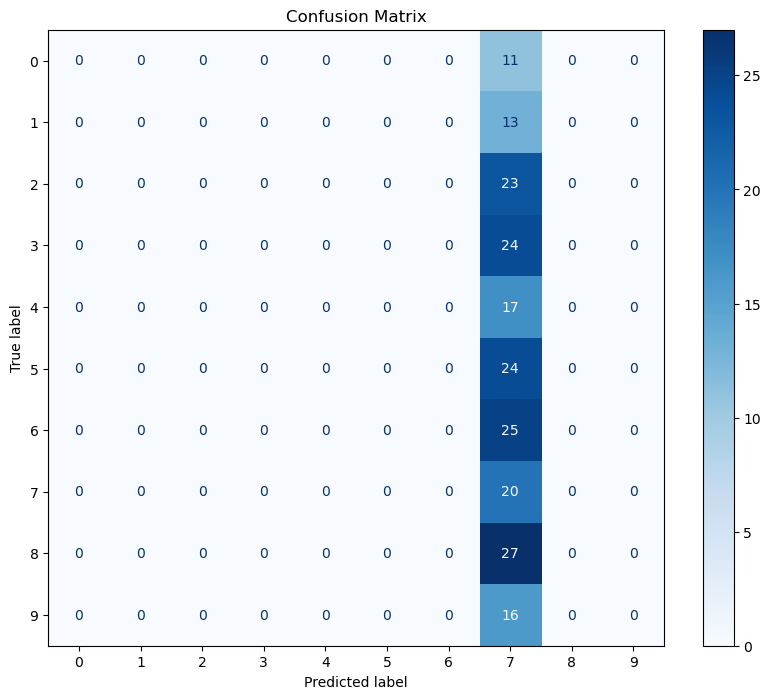

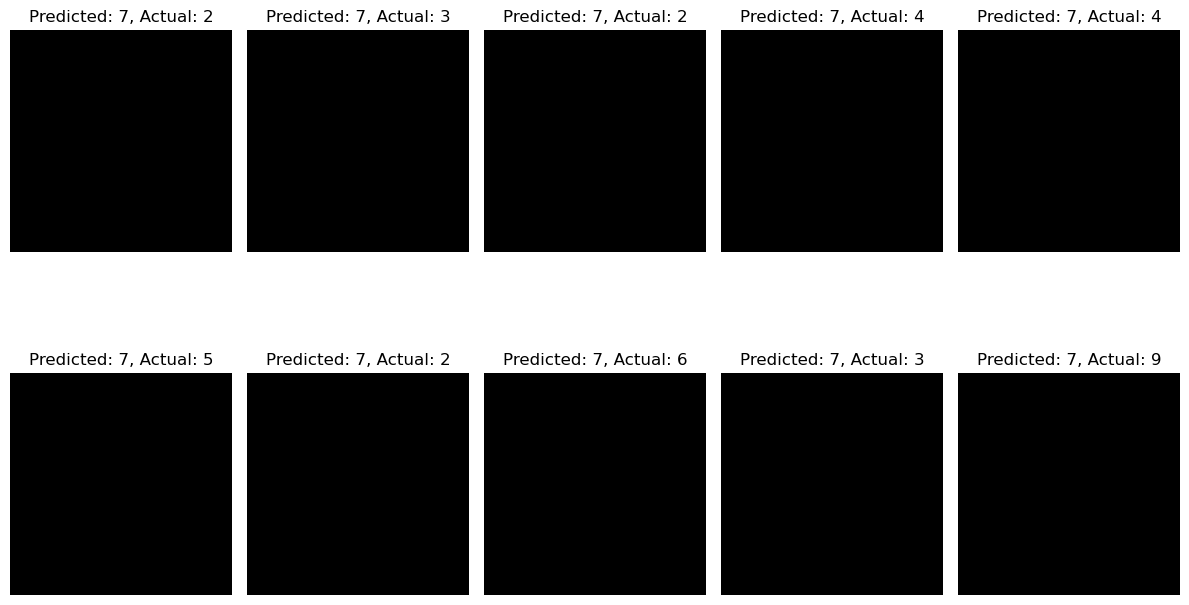

7/7 [==============================] - 11s 2s/step - loss: 2.3071 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the training history if available
history = model.history

if 'loss' in history.history:
    # Visualize training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if 'accuracy' in history.history:
    # Visualize training and validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=range(num_classes)).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# Sample predictions
plt.figure(figsize=(12, 8))
for i in range(10):  # Display predictions for 10 sample images
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Predicted: {y_pred_classes[i]}, Actual: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


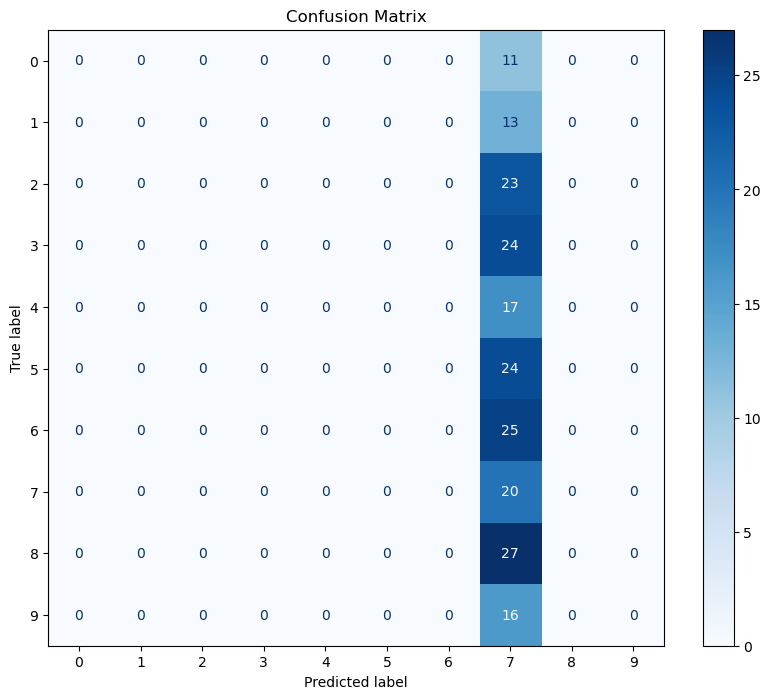

C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


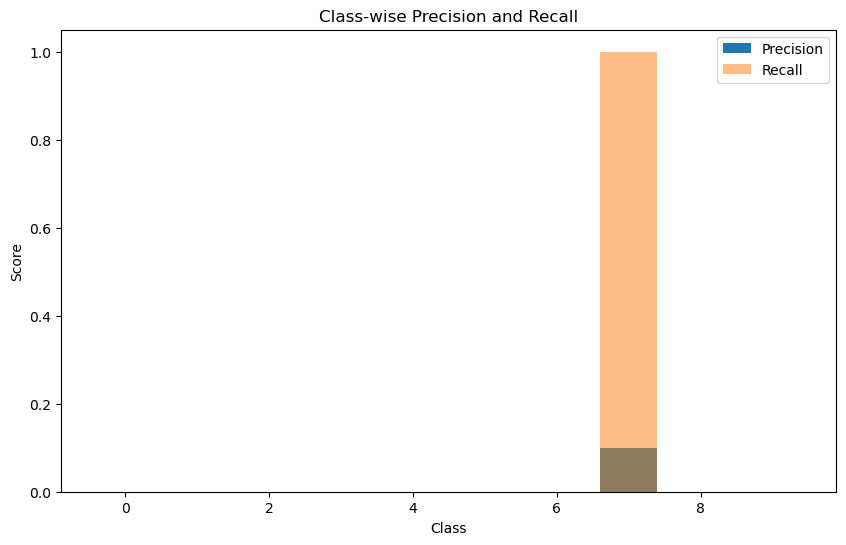

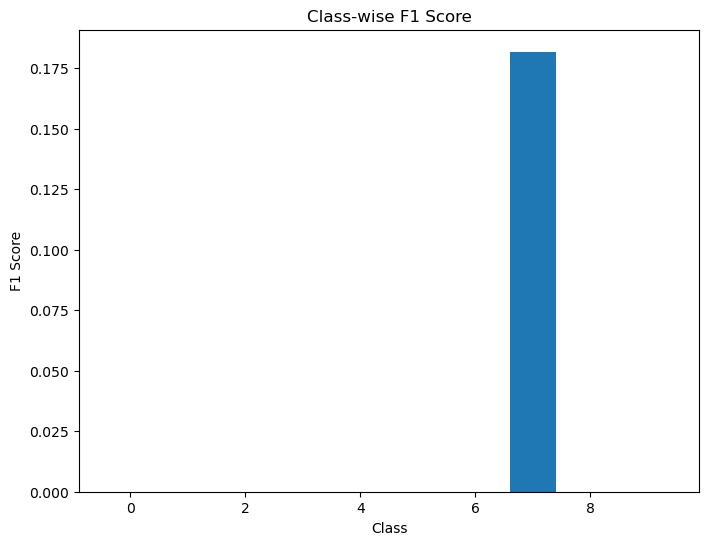

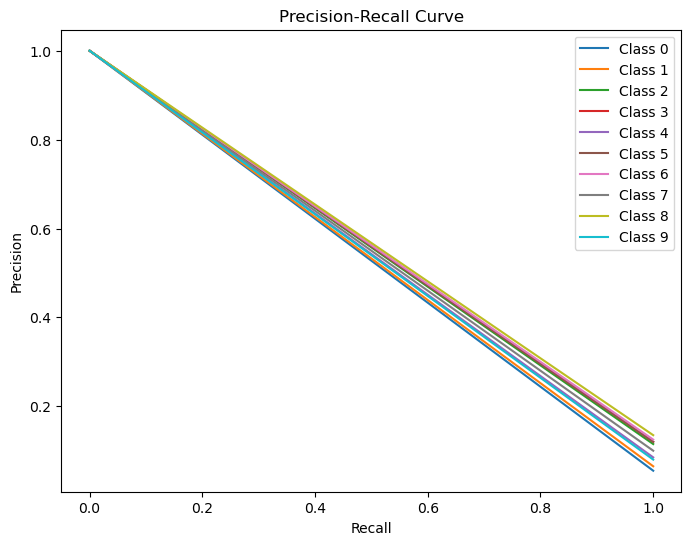

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Generate confusion matrix
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=range(num_classes)).plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# Class-wise Precision and Recall
precision_per_class = precision_score(y_test, y_pred_classes, average=None)
recall_per_class = recall_score(y_test, y_pred_classes, average=None)
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), precision_per_class, label='Precision')
plt.bar(range(num_classes), recall_per_class, label='Recall', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Class-wise Precision and Recall')
plt.legend()
plt.show()

# Class-wise F1 Score
f1_per_class = f1_score(y_test, y_pred_classes, average=None)
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), f1_per_class)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('Class-wise F1 Score')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
